In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from sklearn.metrics import fbeta_score, precision_score, recall_score

from datetime import datetime

In [2]:
df_train = pd.read_hdf("../input/train.h5")
df_test = pd.read_hdf("../input/test.h5")
df_train.shape, df_test.shape

((34999, 180), (35000, 179))

In [3]:
df_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
0   0             0.0             0.0             0.0                    30   
1   1             0.0             0.0             0.0                    30   
2   2             0.0             0.0             0.0                    30   
4   4             0.0             0.0             0.0                    30   
5   5             0.0             0.0             0.0                    30   

   last_date_of_month_7  last_date_of_month_8       arpu_6      arpu_7  \
0                    31                    31    11.200000  672.995972   
1                    31                    31   165.908997  251.362000   
2                    31                    31  1003.799011  449.541992   
4                    31                    31   115.286003   79.556000   
5                    31                    31   283.398010   34.763000   

       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  578.088013     0.000000    17.280001    26.959999     11.430000   
1  254.197998    70.959999    40.459999    41.040001    135.309998   
2  484.000000   847.059998   311.959991   324.709991    108.610001   
4  424.944000     6.640000     0.250000     7.190000     99.440002   
5    0.000000    23.440001     0.000000          NaN    283.579987   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0    258.000000    332.410004            0.0       0.000000            0.0   
1    128.125000     66.239998            0.0      41.060001            0.0   
2     62.312500    111.080002            0.0       0.000000            0.0   
4     52.218750     91.209999            0.0       0.000000            0.0   
5     15.492188           NaN            0.0       0.000000            NaN   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.0       0.000000            0.0          0.000000   
1            0.0      29.059999            0.0         70.610001   
2            0.0       0.000000            0.0        847.059998   
4            0.0       0.000000            0.0          6.640000   
5            0.0       0.000000            NaN         23.440001   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          2.590000         10.390000         11.430000        248.210007   
1         20.410000         41.040001        130.690002         28.430000   
2        311.959991        324.160004        108.360001         62.310001   
4          0.250000          7.190000         37.980000         31.980000   
5          0.000000               NaN         92.629997          1.310000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0        274.459991              0.00              0.43               0.0   
1         58.980000              0.00              0.00               0.0   
2        110.330002              0.00              0.00               0.0   
4         35.930000              1.58              0.00               0.0   
5               NaN              0.00              0.00               NaN   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              9.11              0.58     11.430000   
1              0.00              0.00              2.95    201.309998   
2              0.00              0.00              0.00    955.429993   
4              3.58              0.00              0.63     46.209999   
5              2.03              0.00               NaN    116.080002   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0    251.240005       284.750              0.00             14.68   
1     48.840000       100.000              0.35              0.00   
2    374.279999       434.500              0.00              0.00   
4     32.230000        43.125              0.00              0.00   
5      1.310000           NaN              0.00              0.00   

   s

In [4]:
df_train.head(5)

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
3    3             0.0             0.0             0.0                    30   
6    6             0.0             0.0             0.0                    30   
8    8             0.0             0.0             0.0                    30   
10  10             0.0             0.0             0.0                    30   
11  11             0.0             0.0             0.0                    30   

    last_date_of_month_7  last_date_of_month_8      arpu_6      arpu_7  \
3                     31                    31   94.620003  138.817993   
6                     31                    31  139.126007  183.020996   
8                     31                    31   52.566002  346.907013   
10                    31                    31   43.323002   59.330002   
11                    31                    31  354.372009  354.940002   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
3   129.229004    57.540001    93.080002    79.730003     48.029999   
6   225.307999    57.959999    45.860001    62.860001    170.830002   
8   438.795990     1.650000     1.030000     0.000000      8.480000   
10   23.733000     7.660000     7.530000     1.380000     18.780001   
11  555.270996    99.489998   165.529999   145.830002    148.889999   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
3      110.00000     90.959999            0.0            0.0            0.0   
6      213.25000    167.690002            0.0            0.0            0.0   
8      131.62500    248.009995            0.0            0.0            0.0   
10      37.21875     19.230000            0.0            0.0            0.0   
11     273.50000    240.960007            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
3             0.0            0.0           0.00          8.540000   
6             0.0            0.0           0.00         57.959999   
8             0.0            0.0           6.55          1.650000   
10            0.0            0.0           0.00          7.660000   
11            0.0            0.0           0.00         99.489998   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
3           2.360000         39.029999         26.709999         71.779999   
6          45.860001         62.860001        124.480003        116.790001   
8           1.030000          0.000000          0.160000         16.440001   
10          7.530000          1.380000         18.780001         28.410000   
11        165.529999        145.830002        136.910004        221.779999   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
3          77.129997              0.00              0.26              2.94   
6         146.059998              7.28              2.85              3.38   
8          22.510000              0.00              0.00              3.06   
10         19.230000              0.00              0.00              0.00   
11        205.539993              0.50              4.09              1.71   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
3               0.00              0.00              0.00     35.259998   
6               0.00              0.00              0.00    189.729996   
8               0.00              3.86              3.64      1.810000   
10              0.00              0.93              0.00     26.440001   
11              0.48              0.00              4.38    236.910004   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
3      74.410004    119.125000         48.990002         90.709999   
6     165.509995    212.250000          0.000000          0.000000   
8      17.480000     25.578125          0.000000          0.000000   
10     35.939999     20.609375          0.000000          0.000000   
11    391.410004    353.0000

In [5]:
df_train.shape, df_test.shape

((34999, 180), (35000, 179))

In [6]:
feats_object = df_train.select_dtypes(include=['datetime64[ns]']).columns.to_list()
feats_numeric = df_train.select_dtypes(include=[np.number]).columns.to_list()

df_train[feats_object]

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
3              2014-06-20          2014-07-16          2014-08-26   
6              2014-06-22          2014-07-31          2014-08-26   
8              2014-06-14          2014-07-30          2014-08-30   
10             2014-06-30          2014-07-22          2014-08-26   
11             2014-06-25          2014-07-17          2014-08-19   
...                   ...                 ...                 ...   
69987          2014-06-26          2014-07-28          2014-08-28   
69993          2014-06-30          2014-07-17          2014-08-28   
69994          2014-06-29          2014-07-31          2014-08-31   
69997          2014-06-27          2014-07-25          2014-08-30   
69998          2014-06-30          2014-07-27          2014-08-31   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
3                          NaT                      NaT   
6                          NaT                      NaT   
8                          NaT               2014-07-24   
10                         NaT                      NaT   
11                  2014-06-12               2014-07-10   
...                        ...                      ...   
69987                      NaT                      NaT   
69993                      NaT                      NaT   
69994                      NaT                      NaT   
69997                      NaT                      NaT   
69998               2014-06-30                      NaT   

      date_of_last_rech_data_8  
3                          NaT  
6                          NaT  
8                   2014-08-25  
10                         NaT  
11                  2014-08-08  
...                        ...  
69987                      NaT  
69993                      NaT  
69994               2014-08-09  
69997                      NaT  
69998                      NaT  

[34999 rows x 6 columns]

In [7]:
feats_object

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [8]:
feats_ignore = feats_object + ['id']

In [9]:
feats_ignore

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'id']

In [10]:
df_train[feats_object].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 3 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       34449 non-null  datetime64[ns]
 1   date_of_last_rech_7       34363 non-null  datetime64[ns]
 2   date_of_last_rech_8       33788 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  8767 non-null   datetime64[ns]
 4   date_of_last_rech_data_7  9026 non-null   datetime64[ns]
 5   date_of_last_rech_data_8  9274 non-null   datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.9 MB


In [11]:
feats_numeric = [
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'date_of_last_rech_6_year',
 'date_of_last_rech_7_year',
 'date_of_last_rech_8_year',
 'date_of_last_rech_6_month',
 'date_of_last_rech_7_month',
 'date_of_last_rech_8_month',
 'date_of_last_rech_6_day',
 'date_of_last_rech_7_day',
 'date_of_last_rech_8_day']

In [12]:
len(df_train.columns)

180

In [13]:
df_train.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
3    3             0.0             0.0             0.0                    30   
6    6             0.0             0.0             0.0                    30   
8    8             0.0             0.0             0.0                    30   
10  10             0.0             0.0             0.0                    30   
11  11             0.0             0.0             0.0                    30   

    last_date_of_month_7  last_date_of_month_8      arpu_6      arpu_7  \
3                     31                    31   94.620003  138.817993   
6                     31                    31  139.126007  183.020996   
8                     31                    31   52.566002  346.907013   
10                    31                    31   43.323002   59.330002   
11                    31                    31  354.372009  354.940002   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
3   129.229004    57.540001    93.080002    79.730003     48.029999   
6   225.307999    57.959999    45.860001    62.860001    170.830002   
8   438.795990     1.650000     1.030000     0.000000      8.480000   
10   23.733000     7.660000     7.530000     1.380000     18.780001   
11  555.270996    99.489998   165.529999   145.830002    148.889999   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
3      110.00000     90.959999            0.0            0.0            0.0   
6      213.25000    167.690002            0.0            0.0            0.0   
8      131.62500    248.009995            0.0            0.0            0.0   
10      37.21875     19.230000            0.0            0.0            0.0   
11     273.50000    240.960007            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
3             0.0            0.0           0.00          8.540000   
6             0.0            0.0           0.00         57.959999   
8             0.0            0.0           6.55          1.650000   
10            0.0            0.0           0.00          7.660000   
11            0.0            0.0           0.00         99.489998   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
3           2.360000         39.029999         26.709999         71.779999   
6          45.860001         62.860001        124.480003        116.790001   
8           1.030000          0.000000          0.160000         16.440001   
10          7.530000          1.380000         18.780001         28.410000   
11        165.529999        145.830002        136.910004        221.779999   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
3          77.129997              0.00              0.26              2.94   
6         146.059998              7.28              2.85              3.38   
8          22.510000              0.00              0.00              3.06   
10         19.230000              0.00              0.00              0.00   
11        205.539993              0.50              4.09              1.71   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
3               0.00              0.00              0.00     35.259998   
6               0.00              0.00              0.00    189.729996   
8               0.00              3.86              3.64      1.810000   
10              0.00              0.93              0.00     26.440001   
11              0.48              0.00              4.38    236.910004   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
3      74.410004    119.125000         48.990002         90.709999   
6     165.509995    212.250000          0.000000          0.000000   
8      17.480000     25.578125          0.000000          0.000000   
10     35.939999     20.609375          0.000000          0.000000   
11    391.410004    353.0000

In [14]:
df_train.describe()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count  34999.000000         34633.0         34633.0         34633.0   
mean   34923.361925             0.0             0.0             0.0   
std    20180.156363             0.0             0.0             0.0   
min        3.000000             0.0             0.0             0.0   
25%    17513.500000             0.0             0.0             0.0   
50%    34864.000000             0.0             0.0             0.0   
75%    52450.000000             0.0             0.0             0.0   
max    69998.000000             0.0             0.0             0.0   

       last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  \
count               34999.0               34999.0               34999.0   
mean                   30.0                  31.0                  31.0   
std                     0.0                   0.0                   0.0   
min                    30.0                  31.0                  31.0   
25%                    30.0                  31.0                  31.0   
50%                    30.0                  31.0                  31.0   
75%                    30.0                  31.0                  31.0   
max                    30.0                  31.0                  31.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  34999.000000  34999.000000  34999.000000  33614.000000  33658.000000   
mean     282.200775    277.139404    278.706146    132.281494    133.057281   
std      325.368164    315.762817    325.648834    294.919250    304.560364   
min    -2258.708984  -1084.211060   -491.545013      0.000000      0.000000   
25%       92.927002     87.003502     84.528000      7.415000      6.710000   
50%      196.878998    191.699997    192.386002     34.370003     32.709999   
75%      369.724503    364.791504    369.729996    120.519997    117.360001   
max    15487.683594  14624.088867  16040.502930   7376.709961   8011.910156   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  33141.000000  33614.000000    33658.0000  33141.000000   33614.000000   
mean     132.921173    197.586838           inf    194.946304       9.684899   
std      304.589935    313.711517           inf    317.350403      57.025101   
min        0.000000      0.000000        0.0000      0.000000       0.000000   
25%        6.460000     34.495003       32.1875     31.490000       0.000000   
50%       32.389999     96.540001       91.4375     91.290001       0.000000   
75%      115.839996    232.125000      227.2500    226.529999       0.000000   
max     8022.979980   8362.360352     6596.0000   7857.779785    2850.979980   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   33658.000000   33141.000000   33614.000000   33658.000000   
mean        6.550817       6.818199      13.914225       9.459584   
std        51.668316      49.962536      68.934761      55.492329   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830078    2584.810059    2337.159912    2812.040039   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   33141.000000      33614.000000      33658.000000      33141.000000   
mean        9.864524         46.900009         45.866966         45.533905   
std        67.987717        150.356155        148.451035        140.920456   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.610000          1.560000   
50%         0.000000         11.740000         11.480000         11.740000   
75%         0.000000         40.605000         40.040001         40.240002   
max      5337.040039  

In [15]:
# init setup
from pycaret.classification import *

In [16]:
s = setup(df_train, target='churn_probability', fold=5, 
          ignore_features = feats_ignore,
          numeric_features=feats_numeric,
          use_gpu=True,
          normalize=True,
          transformation=True,
          log_experiment = True, experiment_name = 'churn3',
          fix_imbalance = True,
          session_id=1973)

In [23]:
# launch eda
# !pip install autoviz

eda()

Shape of your Data Set loaded: (34999, 180)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    179 Predictors classified...
        19 variables removed since they were ID or low-information variables
        List of variables removed: ['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6_year', 'date_of_last_rech_7_year', 'date_of_last_rech_8_year', 'date_of_last_rech_6_month', 'date_of_last_rech_7_month', 'date_of_last_rech_8_month']

################ Binary_Classification problem #####################
Number of variables = 160 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 37 Categorical vars selected 
    Removing correlated variables from 123 numerics using SULO method

After removing highly correlated variables, following 61 numeric vars selected: ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',

    30 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
   Total columns > 30, too numerous to print.


Row
    [0] WidgetBox
        [0] Select(name='y', options=['roam_ic_mou_6', ...], value='roam_ic_mou_6')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['roam_ic_mou_6', ...], value='roam_ic_mou_6')
        [1] Select(name='Y-Axis', options=['roam_ic_mou_6', ...], value='roam_ic_mou_7')
        [2] Select(name='Color', options=['None', 'churn_probabilit...], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['ic_others_6', ...], value='ic_others_6', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Layout)

No date vars could be found in data set


HoloViews(Overlay)

Time to run AutoViz (in seconds) = 19


In [28]:
# init server
!mlflow ui

[2022-10-27 08:55:24 +0200] [3277852] [INFO] Starting gunicorn 20.1.0
[2022-10-27 08:55:24 +0200] [3277852] [INFO] Listening at: http://127.0.0.1:5000 (3277852)
[2022-10-27 08:55:24 +0200] [3277852] [INFO] Using worker: sync
[2022-10-27 08:55:24 +0200] [3277853] [INFO] Booting worker with pid: 3277853
^C
[2022-10-27 08:58:42 +0200] [3277852] [INFO] Handling signal: int
[2022-10-27 08:58:42 +0200] [3277853] [INFO] Worker exiting (pid: 3277853)


In [17]:
def cal_metrics(y_test, y_pred):
    return fbeta_score(y_test, y_pred, beta=1.5)

add_metric('f1.5', 'F1.5', cal_metrics)

Name                                                     F1.5
Display Name                                             F1.5
Score Function       <function cal_metrics at 0x7fec93ad8e50>
Scorer                               make_scorer(cal_metrics)
Target                                                   pred
Args                                                       {}
Greater is Better                                        True
Multiclass                                               True
Custom                                                   True
Name: f1.5, dtype: object

In [18]:
# compare all models
best_model_1_5 = compare_models(sort='F1.5')

In [19]:
print(best_model_1_5)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1973, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
tuned_best_model_1_5 = tune_model(estimator=best_model_1_5, optimize="F1.5")

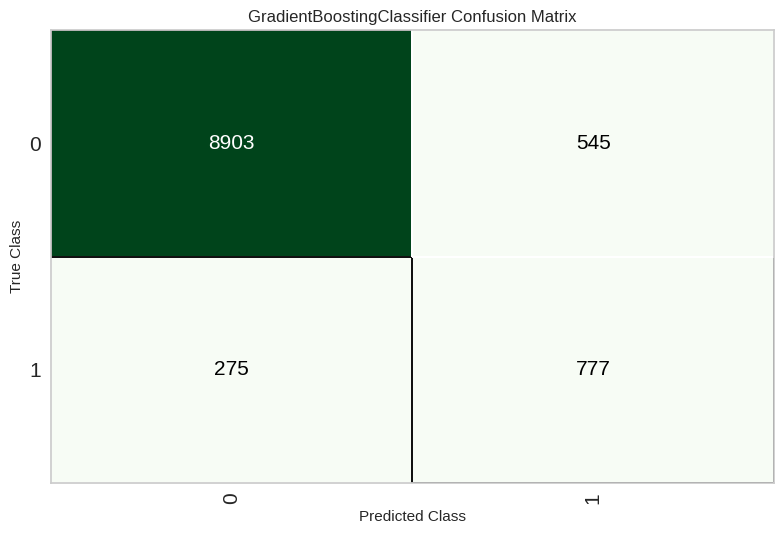

In [25]:
# confusion matrix
plot_model(tuned_best_model_1_5, plot = 'confusion_matrix')

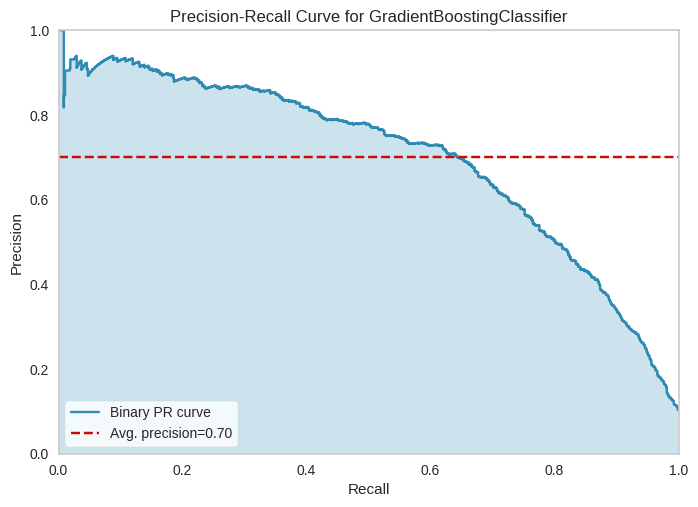

In [26]:
plot_model(tuned_best_model_1_5, plot = 'pr')

In [27]:
evaluate_model(tuned_best_model_1_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])# add metric to PyCaret

add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f8393e639d0>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [41]:
# compare all models
best_model_profit = compare_models(sort='Profit')

In [42]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        cuml.linear_model.logistic_regression.Logistic...   True  
knn       cuml.neighbors.kneighbors_classifier.KNeighbor...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       cuml.linear_model.mbsgd_classifier.MBSGDClassi...   True  
rbfsvm                   pycaret.internal.cuml_wrappers.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge                         cuml.linear_model.ridge.Ridge   True  
rf        cuml.ensemble.randomforestclassifier.RandomFor...   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [ ]:
# # define search space
# params = {"max_depth": np.random.randint(1, (len(boston.columns)*.85),20),
#           "max_features": np.random.randint(1, len(boston.columns),20),
#           "min_samples_leaf": [2,3,4,5,6]}

In [ ]:
# tuned_best_model_profit = tune_model(estimator=best_model_profit, optimize="Profit", n_iter=100, custom_grid = params, search_algorithm = 'hyperopt', return_tuner=True)
# print(tuner)

In [43]:
tuned_best_model_profit = tune_model(estimator=best_model_profit, optimize="Profit")

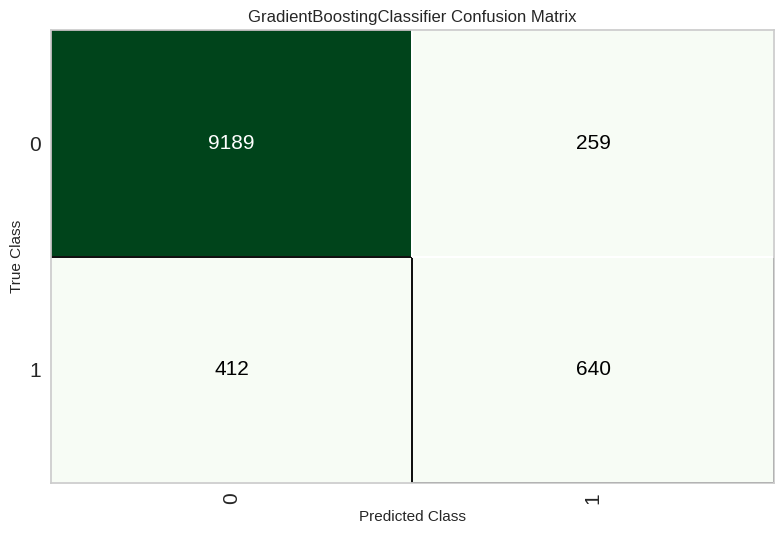

In [44]:
# confusion matrix
plot_model(tuned_best_model_profit, plot = 'confusion_matrix')

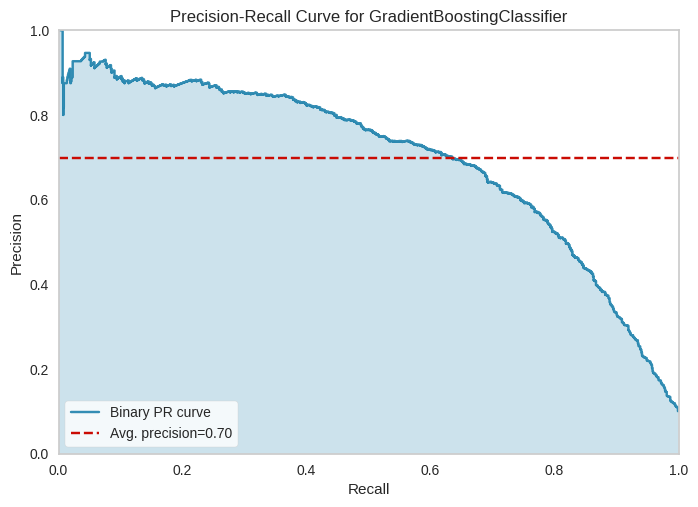

In [45]:
plot_model(tuned_best_model_profit, plot = 'pr')

In [46]:
evaluate_model(tuned_best_model_profit)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [35]:
df_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
0   0             0.0             0.0             0.0                    30   
1   1             0.0             0.0             0.0                    30   
2   2             0.0             0.0             0.0                    30   
4   4             0.0             0.0             0.0                    30   
5   5             0.0             0.0             0.0                    30   

   last_date_of_month_7  last_date_of_month_8       arpu_6      arpu_7  \
0                    31                    31    11.200000  672.995972   
1                    31                    31   165.908997  251.362000   
2                    31                    31  1003.799011  449.541992   
4                    31                    31   115.286003   79.556000   
5                    31                    31   283.398010   34.763000   

       arpu_8  ...  jun_vbc_3g  date_of_last_rech_6_year  \
0  578.088013  ...         0.0                    2014.0   
1  254.197998  ...         0.0                    2014.0   
2  484.000000  ...         0.0                    2014.0   
4  424.944000  ...         0.0                    2014.0   
5    0.000000  ...         0.0                    2014.0   

   date_of_last_rech_7_year  date_of_last_rech_8_year  \
0                    2014.0                    2014.0   
1                    2014.0                    2014.0   
2                    2014.0                    2014.0   
4                    2014.0                    2014.0   
5                    2014.0                    2014.0   

   date_of_last_rech_6_month  date_of_last_rech_7_month  \
0                        6.0                        7.0   
1                        6.0                        7.0   
2                        6.0                        7.0   
4                        6.0                        7.0   
5                        6.0                        7.0   

   date_of_last_rech_8_month  date_of_last_rech_6_day  \
0                        8.0                     12.0   
1                        8.0                     30.0   
2                        8.0                     30.0   
4                        8.0                     30.0   
5                        8.0                     20.0   

   date_of_last_rech_7_day  date_of_last_rech_8_day  
0                     25.0                     28.0  
1                     29.0                     28.0  
2                     29.0                     30.0  
4                     29.0                     31.0  
5                     20.0                     26.0  

[5 rows x 179 columns]

In [36]:
data_unseen = df_test.loc[:, ~df_test.columns.isin(feats_object) ]

In [37]:
predict_model(tuned_best_model_1_5);

In [38]:
final_best_1_5 = finalize_model(tuned_best_model_1_5)

In [39]:
predict_model(final_best_1_5);

In [40]:
unseen_predictions_1_5 = predict_model(final_best_1_5, data=data_unseen)
unseen_predictions_1_5.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
0   0             0.0             0.0             0.0                    30   
1   1             0.0             0.0             0.0                    30   
2   2             0.0             0.0             0.0                    30   
4   4             0.0             0.0             0.0                    30   
5   5             0.0             0.0             0.0                    30   

   last_date_of_month_7  last_date_of_month_8       arpu_6      arpu_7  \
0                    31                    31    11.200000  672.995972   
1                    31                    31   165.908997  251.362000   
2                    31                    31  1003.799011  449.541992   
4                    31                    31   115.286003   79.556000   
5                    31                    31   283.398010   34.763000   

       arpu_8  ...  date_of_last_rech_7_year  date_of_last_rech_8_year  \
0  578.088013  ...                    2014.0                    2014.0   
1  254.197998  ...                    2014.0                    2014.0   
2  484.000000  ...                    2014.0                    2014.0   
4  424.944000  ...                    2014.0                    2014.0   
5    0.000000  ...                    2014.0                    2014.0   

   date_of_last_rech_6_month  date_of_last_rech_7_month  \
0                        6.0                        7.0   
1                        6.0                        7.0   
2                        6.0                        7.0   
4                        6.0                        7.0   
5                        6.0                        7.0   

   date_of_last_rech_8_month  date_of_last_rech_6_day  \
0                        8.0                     12.0   
1                        8.0                     30.0   
2                        8.0                     30.0   
4                        8.0                     30.0   
5                        8.0                     20.0   

   date_of_last_rech_7_day  date_of_last_rech_8_day  Label   Score  
0                     25.0                     28.0      0  0.5237  
1                     29.0                     28.0      0  0.5259  
2                     29.0                     30.0      0  0.5265  
4                     29.0                     31.0      0  0.5266  
5                     20.0                     26.0      1  0.5296  

[5 rows x 175 columns]

In [41]:
df_test['churn_probability'] = unseen_predictions_1_5['Label'].copy()

In [42]:
df_test[ ["id", "churn_probability"] ].to_csv("../output/first_1_5_v2.csv", index=False)

In [65]:
predict_model(tuned_best_model_profit);

In [66]:
final_best_profit = finalize_model(tuned_best_model_profit)

In [67]:
predict_model(final_best_profit);

In [68]:
unseen_predictions_profit = predict_model(final_best_profit, data=data_unseen)
unseen_predictions_profit.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
0   0             0.0             0.0             0.0                    30   
1   1             0.0             0.0             0.0                    30   
2   2             0.0             0.0             0.0                    30   
4   4             0.0             0.0             0.0                    30   
5   5             0.0             0.0             0.0                    30   

   last_date_of_month_7  last_date_of_month_8       arpu_6      arpu_7  \
0                    31                    31    11.200000  672.995972   
1                    31                    31   165.908997  251.362000   
2                    31                    31  1003.799011  449.541992   
4                    31                    31   115.286003   79.556000   
5                    31                    31   283.398010   34.763000   

       arpu_8  ...  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0  578.088013  ...            0        NaN        1.0        1.0   302   
1  254.197998  ...            0        NaN        NaN        NaN   634   
2  484.000000  ...            0        NaN        1.0        NaN  1133   
4  424.944000  ...            8        1.0        NaN        1.0   498   
5    0.000000  ...            0        NaN        NaN        NaN  1989   

   aug_vbc_3g   jul_vbc_3g  jun_vbc_3g  Label   Score  
0  383.170013  1007.099976         0.0      0  0.9909  
1    0.000000     0.000000         0.0      0  0.9912  
2    0.000000     0.000000         0.0      0  0.9893  
4  373.190002     0.000000         0.0      0  0.9927  
5    0.000000     0.000000         0.0      1  0.8086  

[5 rows x 166 columns]

In [69]:
df_test['churn_probability'] = unseen_predictions_profit['Label'].copy()

In [70]:
df_test[ ["id", "churn_probability"] ].to_csv("../output/first_profit.csv", index=False)

In [43]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        cuml.linear_model.logistic_regression.Logistic...   True  
knn       cuml.neighbors.kneighbors_classifier.KNeighbor...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       cuml.linear_model.mbsgd_classifier.MBSGDClassi...   True  
rbfsvm                   pycaret.internal.cuml_wrappers.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge                         cuml.linear_model.ridge.Ridge   True  
rf        cuml.ensemble.randomforestclassifier.RandomFor...   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True